In [1]:
import ast 
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Projects\Luke Barousse Projects\Python Course  Data Analysis\data_jobs.csv")
df=data
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

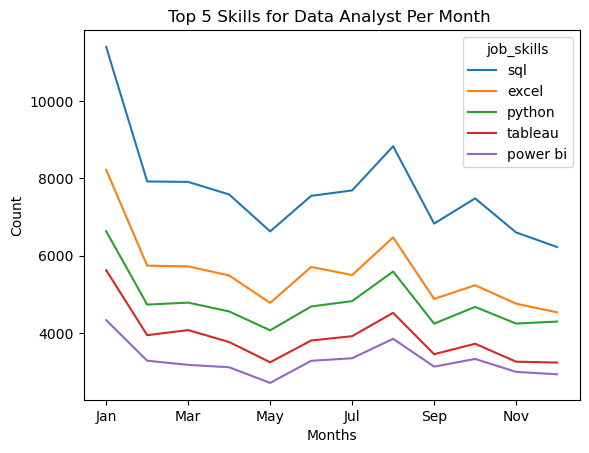

In [ ]:
#Create a new column for month no 
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

#Explode job skill column and pivot 
df_DA_exlpode = df_DA.explode('job_skills')
df_DA_pivot=df_DA_exlpode.pivot_table(index='job_posted_month_no',columns='job_skills' , aggfunc='size',fill_value=0)

#Sort the values by count 
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc["Total"].sort_values(ascending = False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

#Use month names for plotting 
df_DA_pivot =df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot =df_DA_pivot.drop(columns='job_posted_month_no')

#Get the top 5 Skills 
df_DA_pivot.iloc[:,:5].plot(kind='line')
plt.title("Top 5 Skills for Data Analyst Per Month ")
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()


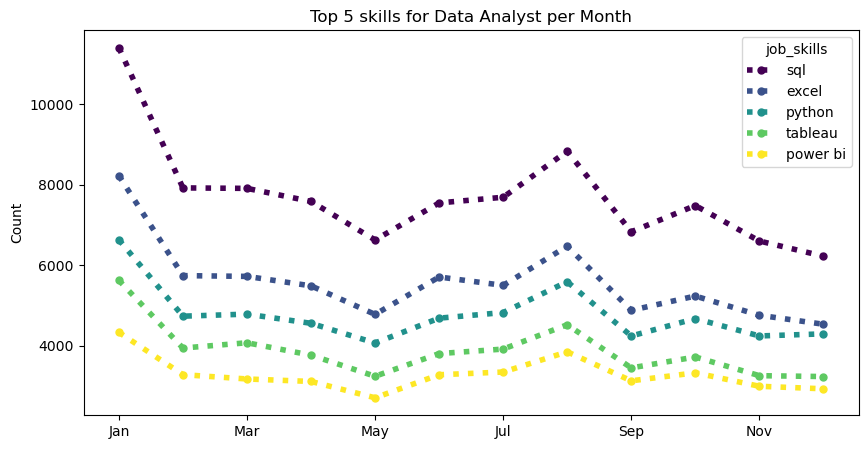

In [15]:
df_DA_pivot.iloc[:, :5].plot(
    kind = 'line',
    linewidth=4,
    linestyle = ':' , #options: '-' , '--' , '-.' , ':'
    colormap = 'viridis', #options: 'viridis' , 'plasma' , 'inferno' , 'magma' , 'cividis' 
    marker = 'o', #options: 'o' , 'x' , '+' , '*' , 's' , ',' , '.' , '1' , '2' , '3' , '4' , ... 
    markersize = 5,
    figsize = (10,5)
)

plt.title("Top 5 skills for Data Analyst per Month")
plt.ylabel('Count')
plt.xlabel("")
plt.show()

Customizing our Scatter Plot from 15_Scatter_plt.ipynb


In [17]:
df_explode = df_DA.explode('job_skills')

#Calculate the average salary and count of job posting per skill
skill_stats = df_explode.groupby('job_skills').agg(
    median_salary = ('salary_year_avg',"median"),
    skill_count = ("job_skills",'count')
)

#Limit to the top skills
skill_count = 20 
skill_stats  = skill_stats.sort_values(by = 'skill_count',ascending = False).head(skill_count)

skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92628
excel,84500.000000,67031
python,98500.000000,57326
tableau,95000.000000,46554
power bi,90000.000000,39468
r,92527.500000,30075
sas,90000.000000,28068
powerpoint,85000.000000,13848
word,80850.000000,13591


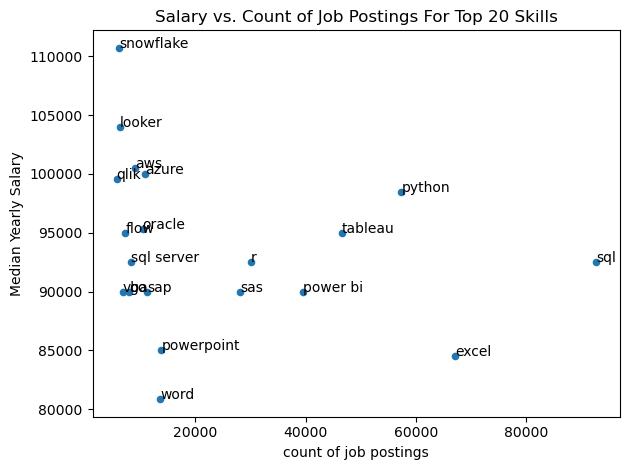

In [27]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')

for i,txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt)

plt.xlabel('count of job postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings For Top {skill_count} Skills')
plt.tight_layout()
plt.show()

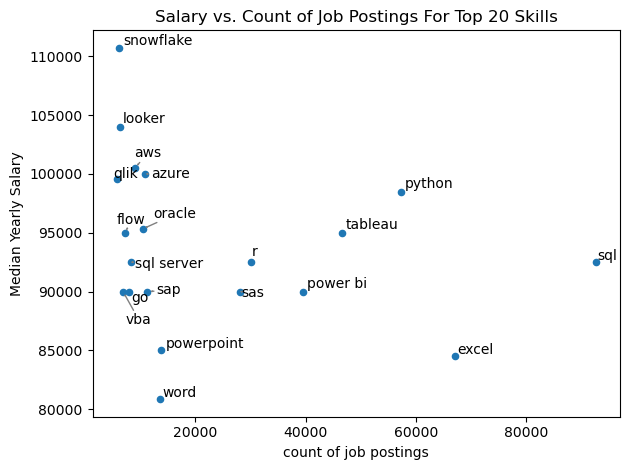

In [28]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')

texts=[]
for i,txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt))

adjust_text(texts,arrowprops=dict(arrowstyle='->',color='grey',lw=1))

plt.xlabel('count of job postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings For Top {skill_count} Skills')
plt.tight_layout()
plt.show()

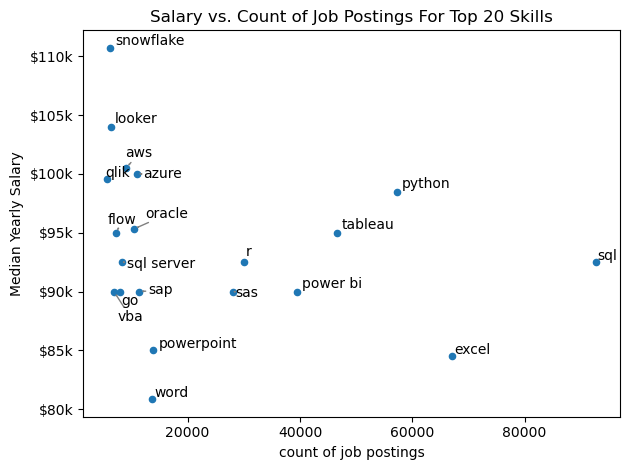

In [33]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')

texts=[]
for i,txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt))

adjust_text(texts,arrowprops=dict(arrowstyle='->',color='grey',lw=1))

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}k' ))

plt.xlabel('count of job postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings For Top {skill_count} Skills')
plt.tight_layout()
plt.show()

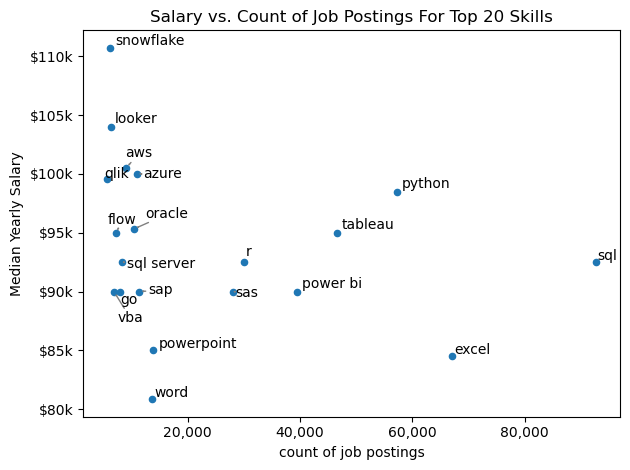

In [34]:
from adjustText import adjust_text
import matplotlib.ticker as mticker     

#scatter plot 
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')

#adding text annotations
texts=[]
for i,txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt))

adjust_text(texts,arrowprops=dict(arrowstyle='->',color='grey',lw=1))

#changes in y Axis 
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}k' ))

#Formatting the x axis with commas
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('count of job postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings For Top {skill_count} Skills')
plt.tight_layout()
plt.show()